#### CSCI-UA.0473-​001 Introduction to Machine Learning

# Homework 4


### Name: Christina Liu


### Due: Nov. 18, 2019


## Goal:  The goal of this homework is to practice implementing Gaussian Discriminant generative model as well as to explore connections between Bayesian inference and regularization in linear regression.

In [167]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

## 1. Gaussian Discriminant Analysis

Here we return to the breast cancer dataset. We will use Gaussian discriminant analysis to classify tumors as either malignant or benign.  

### Part (a)
Implement the 3 methods in the following class.  You may wish to refer to the following Scipy documentation for [multivariate_normal](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html).

In [313]:
class GDA:
    
    """
    Create an instance of a Gaussian discriminant model.
    """
    def __init__(self, train_feat, train_targ):
        assert train_feat.shape[0] == train_targ.shape[0]
        self.N_train = train_feat.shape[0] # The number of training points.
        self.d = train_feat.shape[1] # The dimension of the data.
        self.train_feat = train_feat # Training features.
        self.train_targ = train_targ # Training labels (either 0 or 1).
    
    """
    Learn the parameters for the mean and covariance of the two classes.  Sets the parameters of the Gaussian
    Discriminant model.
    
    phi - float between 0 and 1.
    m0 - numpy array of shape (d, ) for d >= 1, mean of data from class 0
    m1 - numpy array of shape (d, ) for d >= 1, mean of data from class 1
    C - numpy array of shape (d, d) for d >= 1, covariance of data
    
    Output:
    None
    """
    def fit(self):
        X = self.train_feat
        y = self.train_targ
        N = self.N_train
        d = self.d
        
        ## TO DO STARTS HERE ##
        self.__classes = np.unique(y)
        n_classes = len(self.__classes)
        
        self.__phi = np.zeros((n_classes, 1))
        self.__means = np.zeros((n_classes, d))
        self.__sigma = 0
        for i in range(n_classes):
            indexes = np.flatnonzero(y == self.__classes[i])

            self.__phi[i] = len(indexes) / N
            self.__means[i] = np.mean(X[indexes], axis=0)
            self.__sigma += np.cov(X[indexes].T) * (len(indexes) - 1)

        self.__sigma /= N
        
                
        ## TO DO ENDS HERE ##
    
    """
    Return the prediction on the test data.
    
    Input:
    test_data - numpy array of shape (N_test, d) corresponding to the test data.
    
    Output:
    y_pred - numpy array of shape (N_test, ) whose entries are either 0 or 1 corresponding to the predicted class.
    """
    def predict(self, test_data):
        
        ## TO DO STARTS HERE ## 
        pdf = lambda mean: mvn.pdf(test_data, mean=mean, cov=self.__sigma)
        y_probs = np.apply_along_axis(pdf, 1, self.__means) * self.__phi

        y_pred= self.__classes[np.argmax(y_probs, axis=0)]
    
        ## TO DO ENDS HERE ##
        
        return y_pred
        
    """
    Draw samples from the conditional distribution p(x|y = label).
    
    Input:
    label - int, either 0 or 1 corresponding to the class to sample from.
    n_samples - int, the number of samples to draw with class label.
    
    Output:
    x_sampled - numpy array of shape (d, ), a single sample from the conditional distribution.
    """
    def sample(self, label, n_samples):
       
        ## TO DO STARTS HERE ## 
        mn = mvn(mean=self.__means[label], cov=self.__sigma)
        x_sampled = mn.rvs(size=n_samples)
        ## TO DO ENDS HERE ##
        
        return x_sampled

### Part (b)

Fit your GDA model to the cancer training dataset, evaluate it on the test set, and report the accuracy.  You should achieve an accuracy $\sim 85 \%$.

In [314]:
# Loading in the data.
cancer_data = datasets.load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Splitting the data into a training and test set.
N = X.shape[0]
split_idx = int(0.7 * N)
X_train = X[:split_idx, :2]
X_test = X[split_idx:, :2]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [315]:
## TO DO STARTS HERE ##
model = GDA(X_train, y_train)
model.fit()
y_pred= model.predict(X_test)

accuracy = len(y_test[y_pred==y_test])/len(y_test)
## TO DO ENDS HERE ##

print("Accuracy = {:0.1f}%".format(100 * accuracy))

Accuracy = 86.5%


### Part (c)

One of the big advantages of generative models is that they can be used to create synthetic data.  This synthetic data can be used for training a classifier.  In particular, we can now generate balanced datasets.

Use your trained model to generate a synthetic dataset with exactly 50 samples from each class (100 total).  Then create a scatter plot of the results.  Be sure to label the data points according to which class they are in.  You should use **cancer_data['target_names']** to get the list of the names of the two targets rather than refering to them as class 0 and class 1.  For more information about the cancer dataset you can look at **cancer_data.keys()**, although this is not required.

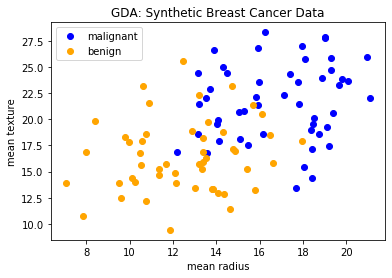

In [317]:
# Generate and plot the new fake dataset, which is balanced with 50 data points from each class (100 total).

## TO DO STARTS HERE ##


x_sampled0 = model.sample(0, 50)
x_sampled1 = model.sample(1, 50)


plt.plot(x_sampled0[:,0],x_sampled0[:,1],  'o', color = 'blue', label = 'malignant')
plt.plot(x_sampled1[:,0], x_sampled1[:,1], 'o', color = 'orange', label = 'benign')

## TO DO ENDS HERE ##

plt.xlabel(cancer_data['feature_names'][0])
plt.ylabel(cancer_data['feature_names'][1])
plt.title('GDA: Synthetic Breast Cancer Data')
plt.legend()
plt.show()

## 2.  Bayesian Linear Regression

### Part (a)
Consider the model
$$
y_i = w^Tx_i + \epsilon_i
$$
where $\epsilon_i \sim N(0, \sigma^2)$ are i.i.d.  Our goal is to infer the weight vector $w$ given $N$ data points $\{(x_i, y_i)\}_{i=1}^N$.
Assume the prior distribution over $w$ is a multivariate Gaussian distribution $N(\nu, \Gamma)$.  


Write down the posterior distribution (up to a normalizing constant) for $w$ given the $N$ training points.

**Answer goes here**
$$posterior = \frac{likelihood*prior}{normalization}$$ 

Using Baye's rule, we get $$p(w|y,x) = \frac{p(y|w,x)*p(w|x)}{p(y|x)} = \frac{(\prod^N_{i=1}p(x_i|w))*p(w|x)}{\int \prod^N_{i=1}p(x_i|w)*p(w|x)dw}$$.


### Part (b)

If we use only a single training point then we can obtain a posterior distribution $p_1(w | x_1,y_1)$.  Given a new training point we can use $p_1$ as a prior to obtain a new posterior $p_2$.  Repeat this for all the $N$ training points.  

Will the result of updating sequentially be the same as updating the prior based on all $N$ training points at once?  Give a proof.

**Answer goes here**
The result of updating sequentially will not be the same as updating the prior based on all N training points at once. Updating the prior based on all N training points at once would result in what we got for part a, however, updating sequentially would result in revised = current x new likelihood instead of posterior= prior x likelihood. $$p_{n+1}(w_{n+1}|y,x_n) = p_{n}(y|w,x_n)*p_{n+1}(w_{n+1}|x_n)$$
which is differnet from part a.

### Part (c)

Recall that for linear regression we are minimizing a loss function
$$
L(w) = \sum_{i=1}^N (w^T x_i - y_i)^2
$$
and that this corresponds to maximizing the log-likelihood $\log p(y|X,w)$.  

1.  Show that minimizing the regularized loss function
$$
L_{\lambda}(w) = \lambda \|w\|^2 + \sum_{i=1}^N (w^T x_i - y_i)^2
$$
corresponds to finding the maximum (MAP estimator)
$$
w^* = \underset{w}{\mathrm{argmax}}\ p(w | X,y)
$$
when the prior distribution for $w$ is an isotropic Gaussian (i.e. a Gaussian of the form $N(0, \sigma^2 I)$, where $I$ is the identity matrix).  

2.  What is the relation between $\lambda$ and $\sigma^2$?

**Answer goes here**
1. $$
min (L_{\lambda}(w)) = min(\lambda \|w\|^2 + \sum_{i=1}^N (w^T x_i - y_i)^2)
$$
$$= \underset{w}{\mathrm{argmax}}(\frac{-X*\pi}{2}+\frac{-y*\pi}{2}-\lambda \|w\|^2 + \sum_{i=1}^N -(w^T x_i - y_i)^2))$$
$$= \underset{w}{\mathrm{argmax}}(p(w)+p(X,y|w))$$
$$= \underset{w}{\mathrm{argmax}}(p(w)+p(X,y|w)-p(X,y))$$
$$
w^* = \underset{w}{\mathrm{argmax}}\ p(w | X,y)
$$
2. In linear regression, we have $L = \frac{1}{2} \|\hat{y}-y\| + \frac{\lambda}{2}  \|w\| 
$ where $y = w^{T}x$.When minimizing this objective function, we end up with $L= \frac{1}{2} \|\hat{y}-y\|$. When we have a Bayesian view of linear regression, the posterior is likelihood times prior: $p(w|x,y)=p(y|x,w)*p(w|\mu_0, \sigma^2)$. When we use the Gaussian prior for weight w, we get the following: $p(w|\mu_0, \sigma^2)=N(0,\sigma^2 )$. SO the relationship of $\lambda $ and $\sigma^2$ is $\lambda=\frac{1}{2\sigma^2}$. $\lambda$ is the regularization rate and $\sigma^2$ is the variance. 

### Part (d)

Now you'll implement Bayesian linear regression to fit a high degree polynomial to some noisy data.  Assume that $x_0,\ldots,x_{10}$ are equally spaced points on the interval $[0,1]$.  In other words, $x_i = i/10$ for $i=0,\ldots,10$.  We wish to approximate some underlying function $f$ with prescibed values $f_i = f(x_i)$ by using a polynomial interpolation.  Recall that we can perfectly interpolate the points using a polynomial of degree $11$ or more.  However, if there is noise in our data this will give very poor results.  In particular, we assume that we instead observe
$$
y_i = f_i + \epsilon_i
$$
where $\epsilon_i$ are iid $N(0,\gamma^2)$ random variables.  We can use a Bayesian approach to help fix this.  Here the parameter $\theta \in \mathbb{R}^{11}$ will denote the coefficients of the polynomial.
$$
\theta_0 + \theta_1 x + \cdots + \theta_{10}x^{10} = (1,x,\ldots,x^{10})^T \theta
$$
Assume the prior distribution for $\theta$ is an isotropic Gaussian of the form $N(0,\sigma^2 I)$.

Implement the two functions below which compute the MAP estimator for the parameters $\theta$ and evaluates the corresponding polynomial.  Hint: It may be useful to consider the Vandermonde matrix $V \in \mathbb{R}^{11 \times 11}$, whose entries are $V_{ij} = (x_i)^j$ for $0 \le i,j, \le 10$.  You may also want to use the Numpy linear algebra package (numpy.linalg).

In [322]:
"""
Input:
y - numpy array of shape (11,) of the observed function values y_i = f_i + epsilon_i.
gamma - positive float, standard deviation of observational noise
sigma - positive float, standard deviation of the prior

Output:
theta - numpy array of shape (11,) of the fitted parameters
"""
def fit(y, gamma, sigma):
    ## TO DO STARTS HERE ##
    beta = 1/gamma**2
    alpha = 1/sigma**2
    theta = alpha + beta*np.transpose(y)*y
    
    ## TO DO ENDS HERE ##
    return theta

"""
Evaluate the polynomial with coefficients theta at the points x.

Input:
x - numpy array of shape (N, ) for N >= 1, the points to evaluate the polynomial at.
theta - numpy array of shape (11, ), the coefficients of the polynomial

theta[0] + theta[1]*x + ... + theta[9]*x^9 + theta[10]*x^10

Output:
vals - numpy array of shape (N, ), the evaluation of the polynomial at the points x.
"""
def evaluate(x, theta):
    vals = np.zeros(x.shape)
    
    ## TO DO STARTS HERE ##
    vals=vals*theta
    vals = vals *np.transpose(x)
    
    ## TO DO ENDS HERE ##
    return vals

### Part (e)

Choose an appropriate choice of $\sigma$ so that the fitted polynomial closely matches the true function $f(x) = x$.  There is not a unique answer to this problem.

In [323]:
## TO DO STARTS HERE ##
# Choose a value of sigma.
sigma = 1.0
## TO DO ENDS HERE ##


# Get the noisy observations and fit the polynomial.
x = np.linspace(0, 1, 11)
gamma = 0.25
np.random.seed(1)
y = x + gamma*np.random.randn(11)

theta = fit(y, gamma = gamma, sigma = sigma)


xx = np.linspace(0,1,1000)
plt.plot(xx, evaluate(xx,theta), label = r'Approximation')
plt.plot(xx, xx, 'k--', alpha = 0.7, label = r'$f(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title('Regularized Approximation')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (1000,) (11,) 